# ANN

The aim of this project is to implement a basic neural network from scratch.

Let's set up the project and look at our data.

## Setup

In [1]:
using Images
using Compose
using Distributions
using Gadfly

In [2]:
include("ann.jl");

In [3]:
df = dataset();

In [4]:
samples = sample(df[df[:label] .== 8, :image], 400);

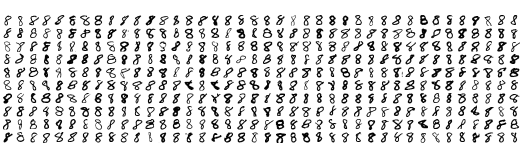

In [5]:
pngs = [to_png(256 - img) for img in samples]
draw(grid(pngs; n_cols = 40)...)

## Learn and predict

Let's try to predict the test set for now. Will add CV next.

In [6]:
model = train(LinearNoBias(), df);

In [7]:
Yp = predict(model, df);

## Evaluation

Let's look at the one vs all evaluation on this training set prediction run:

In [8]:
evaluation(Yp)

,class,accuracy,precision,recall
1,0,0.966,0.764,0.945
2,1,0.975,0.881,0.902
3,2,0.962,0.934,0.666
4,3,0.951,0.753,0.766
5,4,0.96,0.872,0.697
6,5,0.946,0.949,0.421
7,6,0.972,0.829,0.896
8,7,0.97,0.958,0.749
9,8,0.914,0.537,0.867
10,9,0.94,0.657,0.825


### Confusion matrix

The top confusion between digits:

In [9]:
confusions(Yp)

,label,prediction,x1
1,4,9,1417
2,5,8,1120
3,5,3,1057
4,3,8,963
5,2,8,798
6,7,9,794
7,1,8,671
8,5,0,577
9,2,6,463
10,9,8,444


Overall confusion matrix:

In [10]:
confusion_matrix(Yp; n_classes = 10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,6526,0,11,11,6,2,129,1,204,13
2,0,7104,13,26,3,12,28,4,671,16
3,359,187,4657,241,131,0,463,76,798,78
4,198,61,112,5470,5,59,90,30,963,153
5,72,55,11,4,4754,2,189,6,314,1417
6,577,155,34,1057,106,2655,265,19,1120,325
7,270,97,71,6,40,50,6162,0,179,1
8,228,229,40,20,95,0,11,5461,415,794
9,122,108,16,330,23,17,79,9,5919,202
10,191,69,21,95,287,2,16,96,444,5737


### Confusing instances

The following numbers were misclassified:

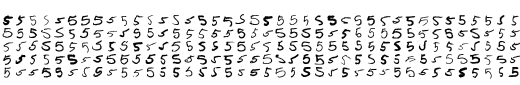

In [11]:
specimen = 5
filtered = Yp[(Yp[:label] .== specimen) & (Yp[:prediction] .!= specimen), :]
draw(grid([to_png(256 - img) for img in sample(filtered[:image], 200)]; n_cols = 40)...)

Let's have a look at the distribution over those misclassifications:

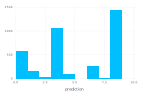

In [12]:
plot(filtered, x = :prediction, Geom.histogram)

The most common confusion is 9, then 6. This is not super surprising; we can see how those might look similar.